
**Decision Trees** and **Random Forests** are powerful techniques in Machine Learning for classification and regression tasks.

---

## 📌 Dataset: Wine Dataset

We will use the **Wine dataset** from `sklearn.datasets`.

**Features:** 13 chemical properties of wines  
**Target:** Wine categories (0, 1, 2)

### ✏️ Python Code (Decision Tree Classifier):

In [25]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [26]:
# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

In [27]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4) #, random_state=42
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

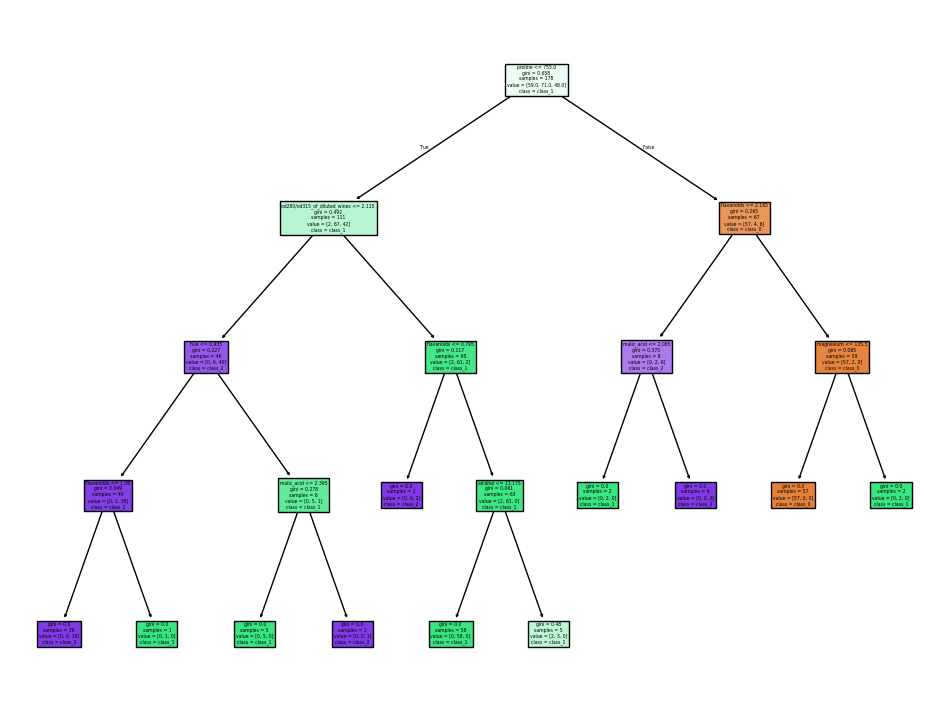

In [28]:

# Plot the Decision Tree
plt.figure(figsize=(12,9))
plot_tree(clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()



---

## 2️⃣ Random Forest Classifier

A **Random Forest** is an ensemble of decision trees. It improves accuracy and reduces overfitting by averaging predictions from multiple trees.

### How it works:
1. Creates multiple bootstrap samples of the data.
2. Trains a decision tree on each sample.
3. Aggregates predictions by majority voting.



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [30]:
# Load data
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

In [31]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

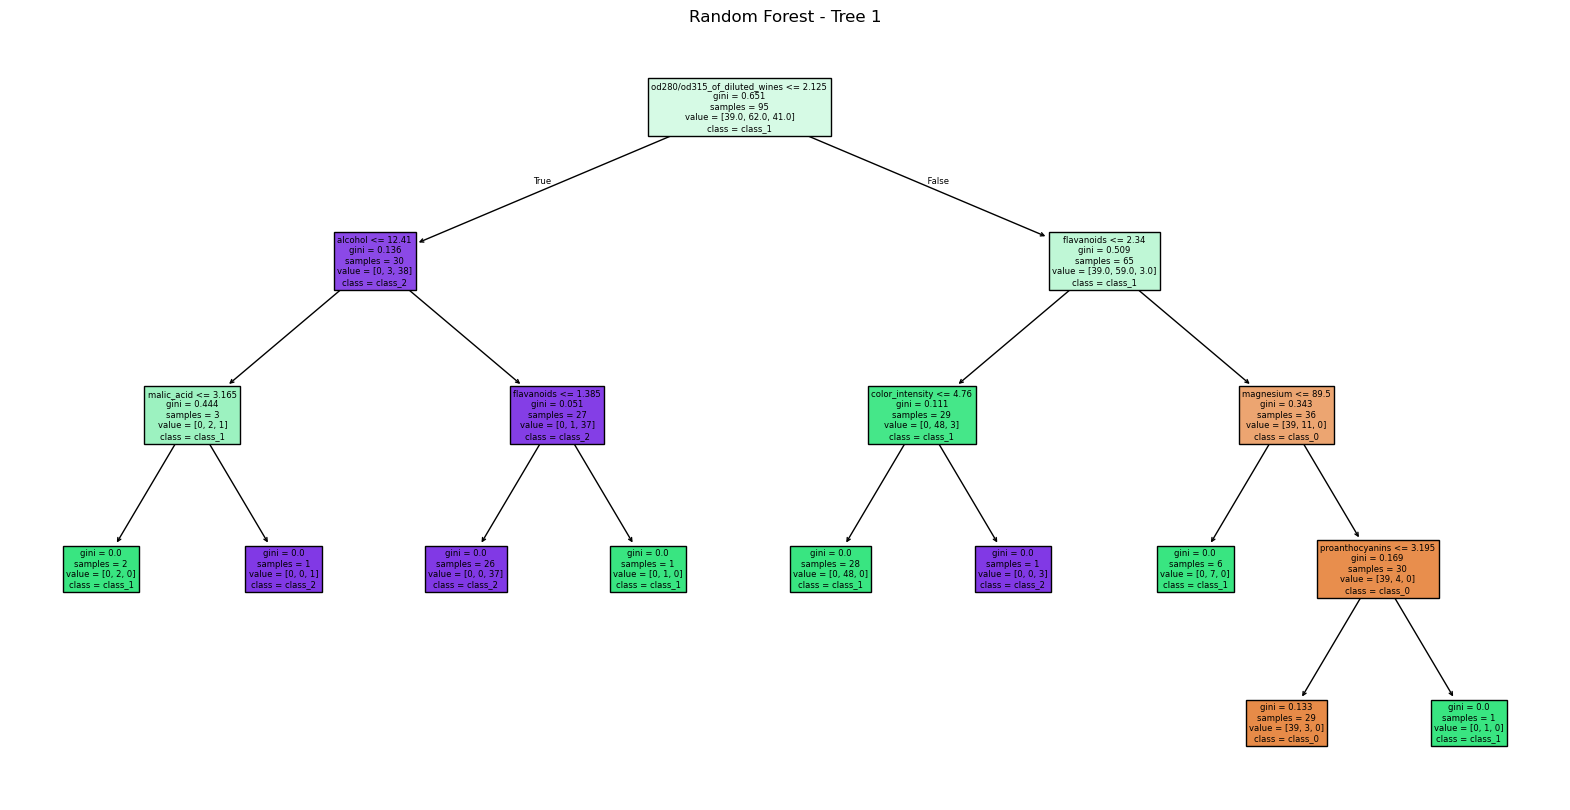

In [32]:
# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Random Forest - Tree 1")
plt.show()

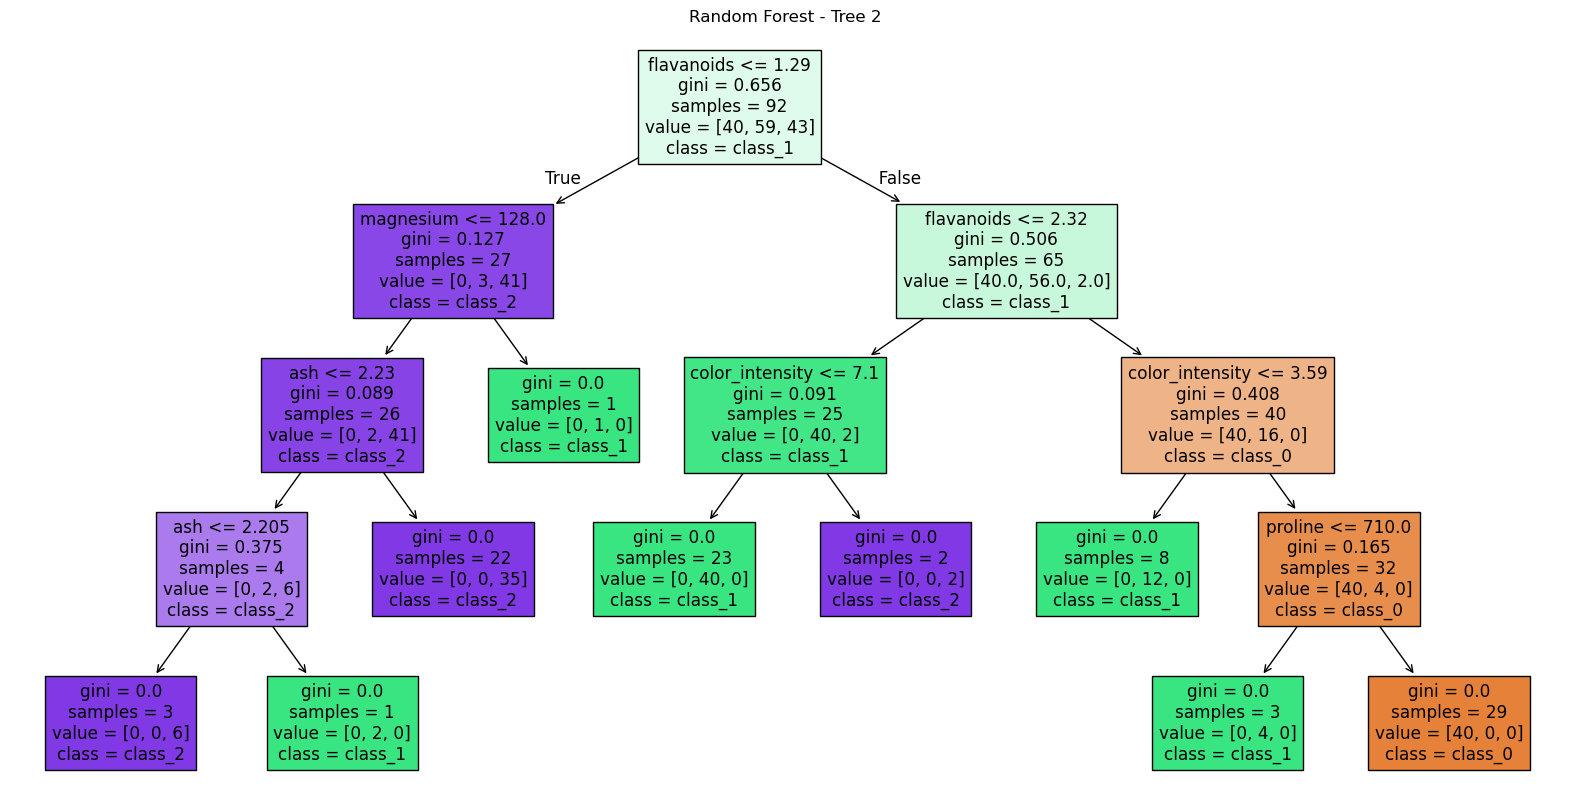

In [33]:
# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[1], feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Random Forest - Tree 2")
plt.show()

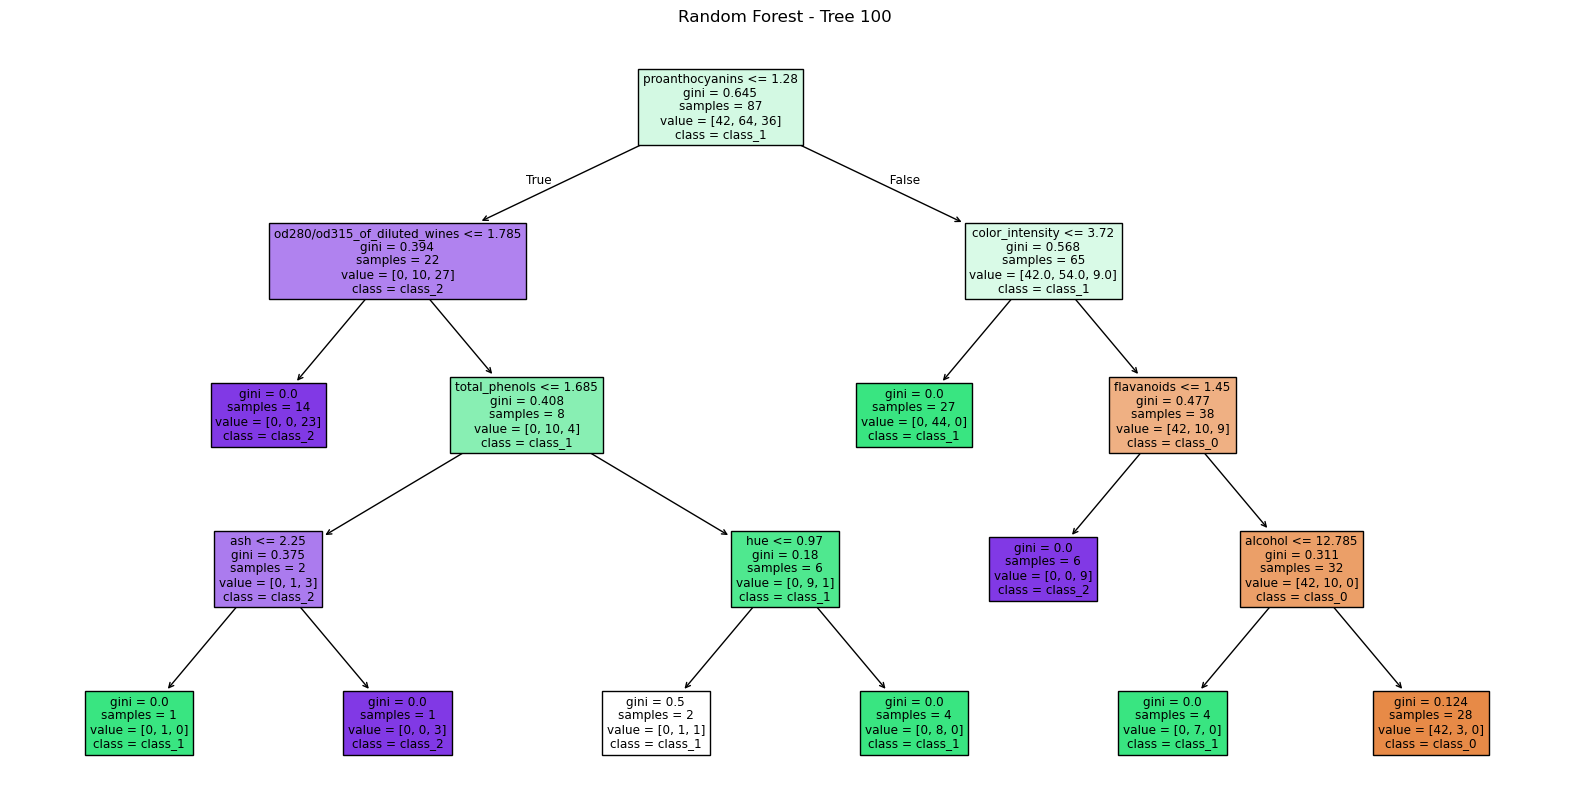

In [34]:
# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[99], feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Random Forest - Tree 100")
plt.show()

In [35]:
# Predict & Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


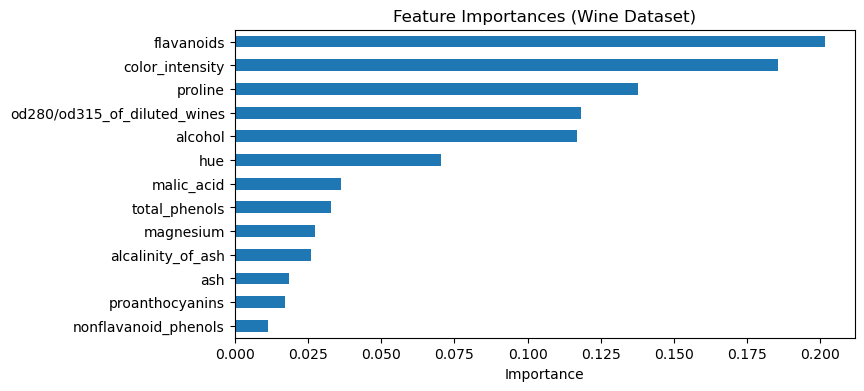

In [36]:
#This tells which features are most influential in the forest.
import pandas as pd

# Get feature importances
importances = rf.feature_importances_
feat_names = wine.feature_names
feat_importances = pd.Series(importances, index=feat_names)

# Plot feature importances
feat_importances.sort_values().plot(
    kind='barh',
    figsize=(8, 4),
    title='Feature Importances (Wine Dataset)'
)
plt.xlabel("Importance")
plt.show()



---

## 📊 Conclusion:

- **Decision Tree**: Simple, interpretable, but prone to overfitting.
- **Random Forest**: More robust, better accuracy, less overfitting.

For the Wine dataset, Random Forest usually gives higher accuracy than a single Decision Tree.
